#CAR RPICE PREDICTION

---

###Importing dependencies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn import metrics

###Reading the Data

In [5]:
data = pd.read_csv('/content/car data.csv')

###Statistical Analysis of the Dataset

In [6]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [34]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
data.shape

(301, 9)

In [10]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [11]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [12]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

###Encoding the Categorical Data

In [14]:
data  = data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}})

In [15]:
data  = data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}})

In [16]:
data = data.replace({'Transmission':{'Manual':0, 'Automatic':1}})

In [17]:
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1              0   

###Splitting the data into 80:20 for training and testing

In [18]:
X = data.drop(['Car_Name','Selling_Price'], axis=1)

In [19]:
Y = data['Selling_Price']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 123)

###Fitting the data to Machine Learning Model 1 (Linear Regression)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, Y_train)

LinearRegression()

###Model 1 Evaluation

On train Data

In [23]:
train_prediction = model.predict(X_train)
error_score = metrics.r2_score(Y_train, train_prediction)
print(error_score)

0.886975349914778


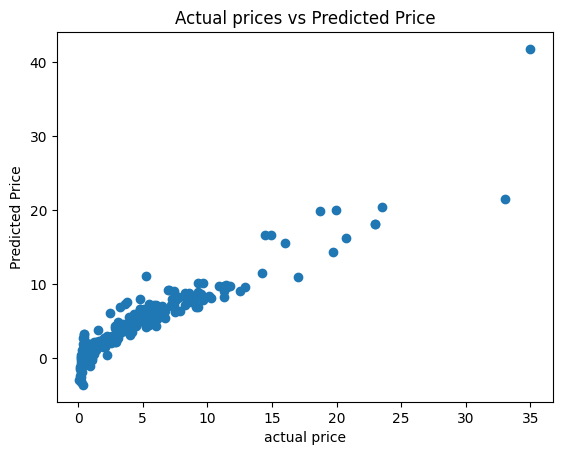

In [24]:
plt.scatter(Y_train, train_prediction)
plt.xlabel("actual price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted Price")
plt.show()

On test data

In [25]:
test_prediction = model.predict(X_test)
error_score2 = metrics.r2_score(Y_test, test_prediction)
print(error_score2)

0.8114116982277362


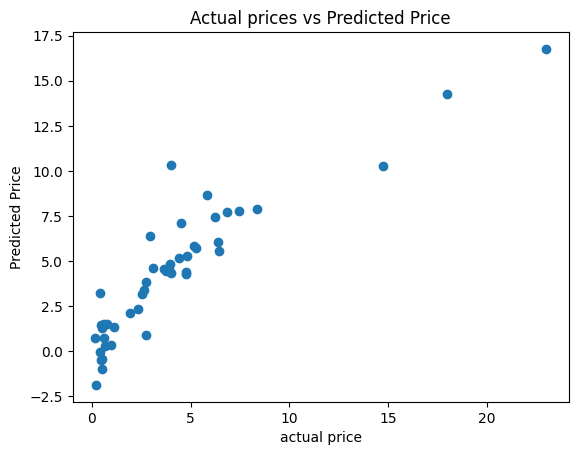

In [26]:
plt.scatter(Y_test, test_prediction)
plt.xlabel("actual price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted Price")
plt.show()

###Fitting the data to Machine Learning Model 2 (Lesso)

In [27]:
model = Lasso()

In [28]:
model.fit(X_train, Y_train)

Lasso()

###Model 2 Evaluation

On Training Data

In [29]:
train_prediction = model.predict(X_train)
error_score = metrics.r2_score(Y_train, train_prediction)
print(error_score)

0.8520207124231509


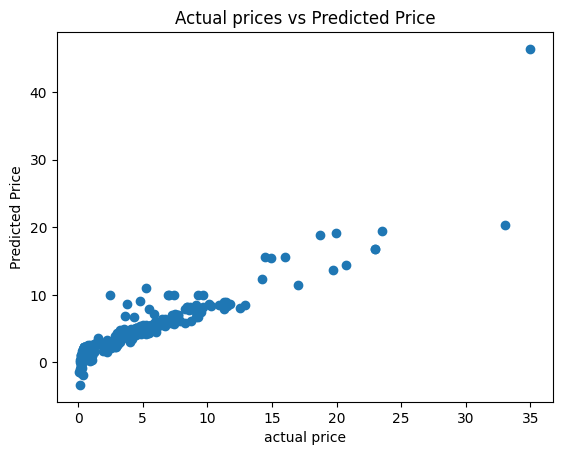

In [30]:
plt.scatter(Y_train, train_prediction)
plt.xlabel("actual price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted Price")
plt.show()

On Testin Data

In [31]:
test_prediction = model.predict(X_test)
error_score2 = metrics.r2_score(Y_test, test_prediction)
print(error_score2)

0.7613012331447591


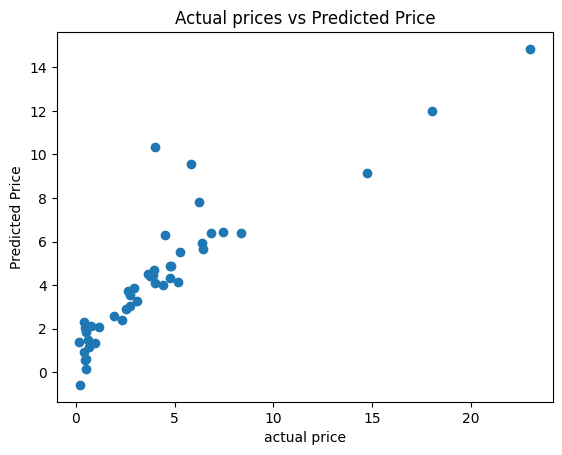

In [32]:
plt.scatter(Y_test, test_prediction)
plt.xlabel("actual price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted Price")
plt.show()